In [ ]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error ,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from sklearn.metrics import accuracy_score




In [ ]:
drive.mount("/content/drive")
data = pd.read_excel("/content/drive/My Drive/ColabData/araba.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13116 entries, 0 to 13115
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yıl            13116 non-null  int64  
 1   fiyatDolar     13116 non-null  int64  
 2   vites          13116 non-null  int64  
 3   km             13116 non-null  int64  
 4   vergi          13116 non-null  int64  
 5   yakıtTüketimi  13116 non-null  float64
 6   motorGücü      13116 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 717.4 KB


In [ ]:
data.isnull().sum()

yıl              0
fiyatDolar       0
vites            0
km               0
vergi            0
yakıtTüketimi    0
motorGücü        0
dtype: int64

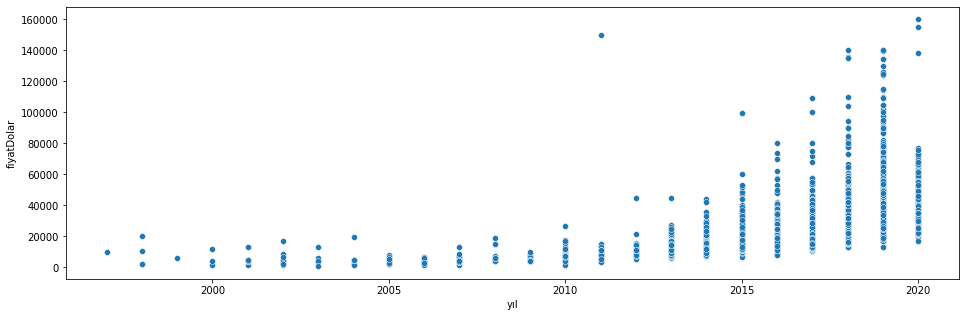

In [ ]:
sbn.scatterplot(x='yıl', y= 'fiyatDolar', data=data)


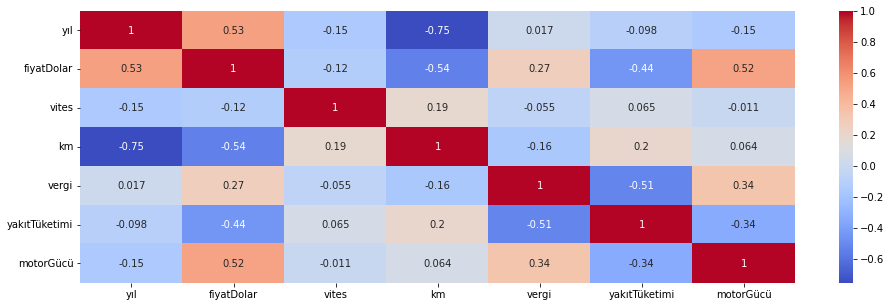

In [ ]:
sbn.heatmap(data.corr(), annot=True, cmap='coolwarm') 
plt.show() 

In [ ]:
y= data['fiyatDolar'].values
x = data.drop('fiyatDolar', axis= 1).values

In [ ]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

In [ ]:
sc = MinMaxScaler()
x_test = sc.fit_transform(x_test)
x_train = sc.fit_transform(x_train)

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=100, stop = 1200, num = 12)] 
max_features = ['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
random_grid = {'n_estimators': n_estimators,
              'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}



In [ ]:
rf = RandomForestRegressor()
regressor_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, scoring='neg_mean_squared_error',n_iter=5, cv=2, verbose=2, random_state=42,n_jobs=1)
regressor_random.fit(x_train,y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimat

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
tahminler = regressor_random.predict(x_test)
print(tahminler)

[28335.06799944 23123.05955381 28467.4482281  ... 18399.42832743
 50496.14882987 16188.06844447]


In [ ]:
errors = abs(tahminler - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Doğruluk = {:0.2f}%.'.format(accuracy))

Doğruluk = 90.89%.


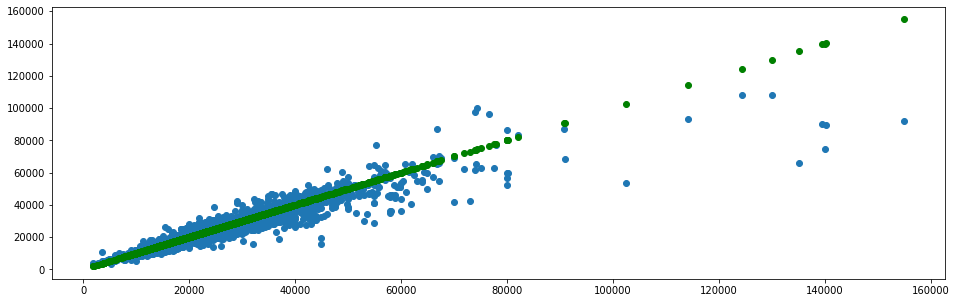

In [ ]:
plt.scatter(y_test, tahminler)
plt.plot(y_test,y_test,'go' )

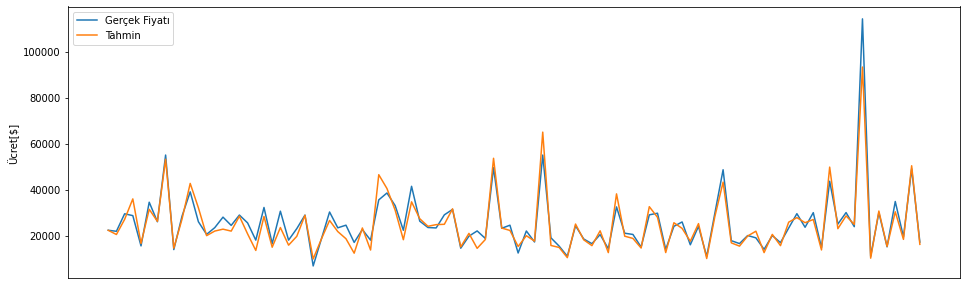

In [ ]:
A = y_test.reshape(-1, 1)
B = tahminler.reshape(-1, 1)
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Gerçek Fiyatı")
plt.plot(B[-100:], label="Tahmin")
plt.legend()
plt.ylabel("Ücret[$]")
plt.xticks(())
plt.show()